SABR model:
$$
\begin{aligned}
    &dF_t = \alpha_t F_t^{\beta} dW_t\\
    &d\alpha_t = v \alpha_t dZ_t\\
    dW_t dZ_t = \rho dt
\end{aligned}
$$

Let us introduce parameters:
$$
\begin{aligned}
&F_m = \sqrt{F K}\\
&\zeta = \dfrac{v}{\alpha}F_m^{1-\beta}\log \dfrac{F}{K}\\
&X(\zeta, \rho) = \log \dfrac{\sqrt{1 - 2 \zeta \rho + \zeta^2} + \zeta - \rho}{1-\rho}\\
&q_1 = \dfrac{(\beta-1)^2 \alpha^2 F_m^{2\beta - 2}}{24}\\
&q_2 = \dfrac{\rho \beta \alpha v F_m^{\beta - 1}}{4}\\
&q_3 = \dfrac{2-3\rho^2}{24}v^2\\
&S = 1 + T(q_1 + q_2 + q_3)\\
&D = F_m^{1-\beta}\left[ 1 + \dfrac{(\beta-1)^2}{24} \log^2 \dfrac{F}{K} + \dfrac{(\beta-1)^4}{1920}\log^4 \dfrac{F}{K}\right]\\
\end{aligned}
$$
$$
\sigma = \dfrac{\alpha S}{D} \times \dfrac{\zeta}{X(\zeta, \rho)}
$$

In [1]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

## SABR calibration example

In [32]:
#sabr model parameters
alpha = 0.2
v = 0.9
beta = 0.9
rho = -0.5

sabr_params_0 = np.asarray([alpha, v, beta, rho])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [33]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [34]:
c0, iv0 = sabr_0( Kn, F, T )

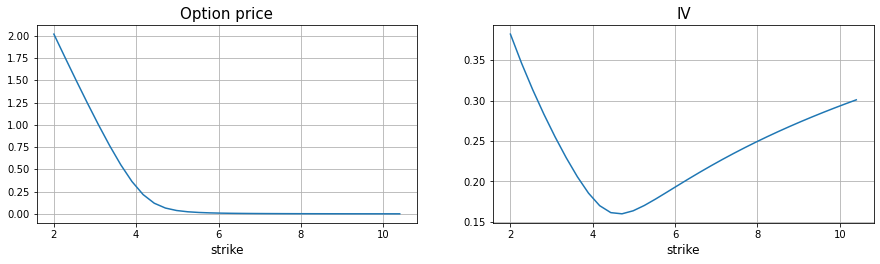

In [35]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration:

In [36]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

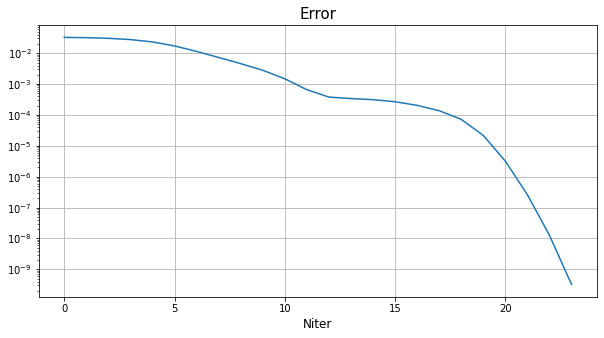

In [37]:
#calibrate sabr model
fs = sabr_calib.fit_iv(iv0, Kn, F, T)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [38]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [ 0.2  0.9  0.9 -0.5]
calib params: [ 0.2  0.9  0.9 -0.5]


In [39]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [40]:
c1 - c0

array([ 1.54036783e-11,  1.09765530e-11,  3.44702045e-12, -7.58193508e-12,
       -2.19313456e-11, -3.79807297e-11, -5.10693710e-11, -5.21662713e-11,
       -3.28650440e-11, -2.39697151e-12,  1.65941705e-11,  2.03406181e-11,
        1.75019443e-11,  1.34773026e-11,  9.96513982e-12,  7.24122151e-12,
        5.20233856e-12,  3.68655106e-12,  2.55587912e-12,  1.70559400e-12,
        1.06069320e-12,  5.67081104e-13,  1.86219096e-13, -1.09703913e-13,
       -3.41070922e-13, -5.22644428e-13, -6.65828503e-13, -7.78807574e-13,
       -8.68067770e-13, -9.38445502e-13, -9.93748486e-13, -1.03697086e-12])

In [41]:
iv1 - iv0

array([ 5.68795566e-11,  2.88177260e-11,  6.58290089e-12, -1.07619469e-11,
       -2.36733966e-11, -3.21028204e-11, -3.53133078e-11, -3.16843496e-11,
       -1.96200278e-11, -1.62503344e-12,  1.44373125e-11,  2.40547859e-11,
        2.83154056e-11,  2.93345348e-11,  2.84983426e-11,  2.65652778e-11,
        2.39488707e-11,  2.08841555e-11,  1.75135462e-11,  1.39264156e-11,
        1.01849362e-11,  6.32943697e-12,  2.39192000e-12, -1.60621516e-12,
       -5.64787106e-12, -9.71833725e-12, -1.38084544e-11, -1.79092852e-11,
       -2.20145013e-11, -2.61188293e-11, -3.02161074e-11, -3.43042261e-11])

In [42]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.5
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [43]:
#heston model object
heston = Heston(heston_params, r)

In [44]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

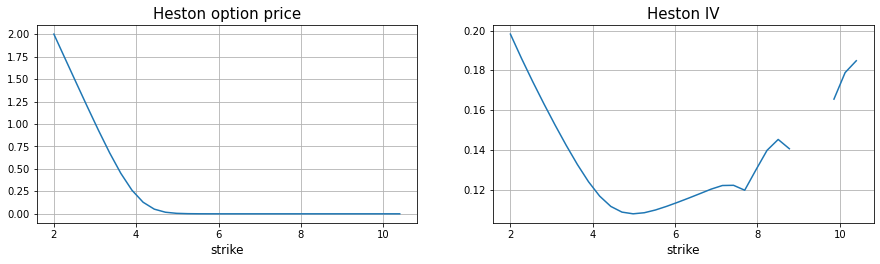

In [45]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration to heston data

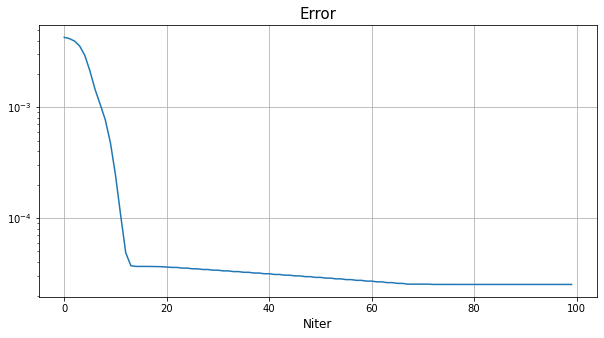

In [46]:
#calibrating sabr to heston
fs = sabr_calib.fit_price(ch, Kn, F, T, True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [47]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

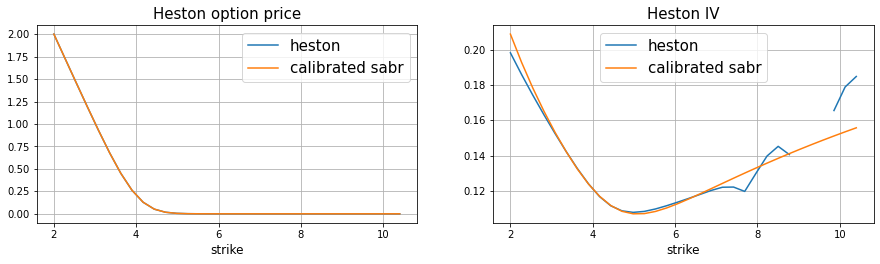

In [48]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

In [49]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [50]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0231%,
error in iv = nan%
